In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
bike_rentals = pd.read_csv("C:/bigdata/paragithub/minerando dados/prevendo alugueis de bicicleta/bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Entendendo a base de dados:
##### instant: índice de registro
##### dteday: data do aluguel (ano-mês-dia)
##### season: estação (1: inverno, 2: primavera, 3: verão, 4: outono)
##### yr: ano (0: 2011, 1: 2012)
##### mnth: mês (1 a 12)
##### hr: hora (0 a 23)
##### holiday: o dia com clima é feriado ou não (extraído de [Web Link])
##### weekday: dia da semana
##### workingday: se o dia não for final de semana nem feriado, for 1, caso contrário será 0 – equivalente ao dia útil.
##### weathersit: tempo
##### 1: limpo, poucas nuvens, parcialmente nublado, parcialmente nublado
##### 2: névoa + nublado, névoa + nuvens partidas, névoa + poucas nuvens, névoa
##### 3: neve fraca, chuva fraca + trovoada + nuvens dispersas, chuva fraca + nuvens dispersas
##### 4: chuva forte + paletes de gelo + trovoada + névoa, neve + nevoeiro
##### temp: temperatura normalizada em graus Celsius. Os valores são derivados de (t-t_min) / (t_max-t_min), t_min = -8, t_max = + 39 (apenas na escala horária)
##### atemp: temperatura normal de sensação em graus Celsius. Os valores são derivados de (t-t_min) / (t_max-t_min), t_min = -16, t_max = + 50 (apenas na escala horária)
##### hum: umidade normalizada. Os valores são divididos em 100 (máximo)
##### windspeed: velocidade do vento normalizada. Os valores são divididos em 67 (máximo)
##### casual: número de usuários casuais
##### registered: número de usuários registrados
##### cnt: contagem do total de bicicletas alugadas, incluindo bicicletas casuais e registradas (variável target)

<center><h1>Análise de Dados e Pré-processamento de Dados</h1></center>


In [3]:
# informações estatisticas da nossa base
bike_rentals.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Distribuição do atributo cnt

### observação: cnt é a variável ALVO

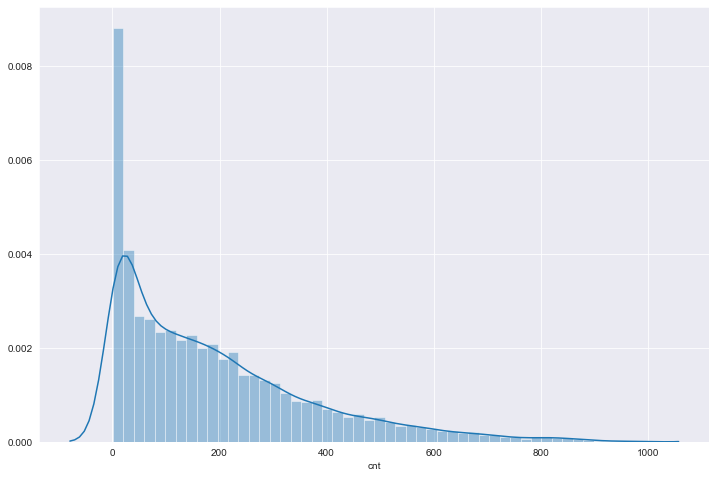

In [6]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(bike_rentals.cnt)

# Calculando a correlação entre as variáveis:


In [7]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [8]:
correlations = bike_rentals.corr()
correlations['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

### Excluindo os atributos que são subcategorias do atributo alvo: casual, registered e do tipo date:


In [9]:
columns = bike_rentals.columns.drop(['cnt', 'casual', 'dteday', 'registered'])
columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

<center><h1>Utilizando Machine Learning para realizar a previsão</h1></center>

### Importando o método train_test_split para realizar a separação dos dados de forma aleatória:

In [22]:
from sklearn.model_selection import train_test_split

### Separando os dados de treino e teste:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(bike_rentals[columns],bike_rentals['cnt'], test_size=0.20, random_state=42)

### Instanciando o algoritmo:


In [20]:
lr = LinearRegression()

### Treinando o algoritmo e gerando o modelo de regressão

In [23]:
model = lr.fit(X_train,y_train)



### Realizando a predição

In [24]:
resultado = model.predict(X_test)

<center><h1>Calculando o erro médio quadrático</h1></center>

In [27]:
mean_squared_error(y_test, resultado)

19376.952766955474

### Computando o Score:

In [28]:
model.score(X_test,y_test)

0.3880719703569244

### Comparando os resultados aplicando os dados de treinamento:

In [29]:
resultado_treino = model.predict(X_train)
mean_squared_error(y_train, resultado_treino)

20292.141009176416

In [31]:
model.score(X_train,y_train)

0.38882636769645706

# Testando os resultados utilizando um modelo baseado em Árvore de Decisão

### Instanciando o algoritmo:

In [32]:
tree = DecisionTreeRegressor()

### Treinando o algoritmo e gerando o modelo:

In [34]:
model_tree = tree.fit(X_train,y_train)
resultado_tree = tree.predict(X_test)


### Calculando o erro médio quadrático com a arvore de decisão:

In [36]:
mean_squared_error(y_test, resultado_tree)

3453.149597238205

### obervação: repare que o erro médio quadrático diminuiu bastante


### Computando o Score:


In [37]:
model_tree.score(X_test,y_test)

0.8909488476070242

<center><h1>Melhorando os resultados utilizando o Random Forest</h1></center>

### Instanciando o algoritmo:

In [40]:
tree_rf = RandomForestRegressor()

### Treinando o algoritmo e gerando o modelo:

In [41]:
model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

### Calculando o erro médio quadrático:

In [42]:
mean_squared_error(y_test, resultado_rf)

1648.4433853279631

### Computando o Score:

In [43]:
model_rf.score(X_test,y_test)

0.9479418294045625

<center><h1>Ajustando os hiperparametros do Random Forest</h1></center>

In [45]:
# Todos os modelos testados até o momento foram instanciados na sua forma mais básica sem nenhum ajuste de parâmetro.
#Já temos o modelo que apresenta os melhores resultados e agora a meta e tentar encontrar os melhores parâmetros.


In [46]:
from sklearn.model_selection import GridSearchCV

### Especificando os parâmetros de tunning:

In [47]:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

### O min_samples_leaf é o número mínimo de amostras necessárias para estar em um nó folha.

### O min_samples_split é o número mínimo de amostras necessárias para dividir um nó interno.

### E o n_estimators é o número de árvores que será gerada.

# Instanciando o RandomForest e GridSearch:

In [48]:
rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametros)

### Executando o grid:

In [49]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 10],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 250, 500, 750]})

### Verificando os melhores parâmetros:

In [50]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

### Recuperando o melhor estimator:

In [51]:
rf_best = grid.best_estimator_

### Gerando o resultado final:

In [52]:
resultado_final = rf_best.predict(X_test)

### Calculando o erro médio quadrático:

In [53]:
mean_squared_error(y_test, resultado_final)

1649.548471314154

### Computando o Score:

In [54]:
rf_best.score(X_test,y_test)

0.9479069305689072